<a href="https://colab.research.google.com/github/BrunoMaia23/Am/blob/main/MVP3_PUC_RJ_RandomForest_Model_Seaborn_Charts_Probability_of_Winning_2026_World_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-18-1863a82e9540>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=probabilidades_df, x='Selecao', y='Probabilidade', palette='coolwarm')


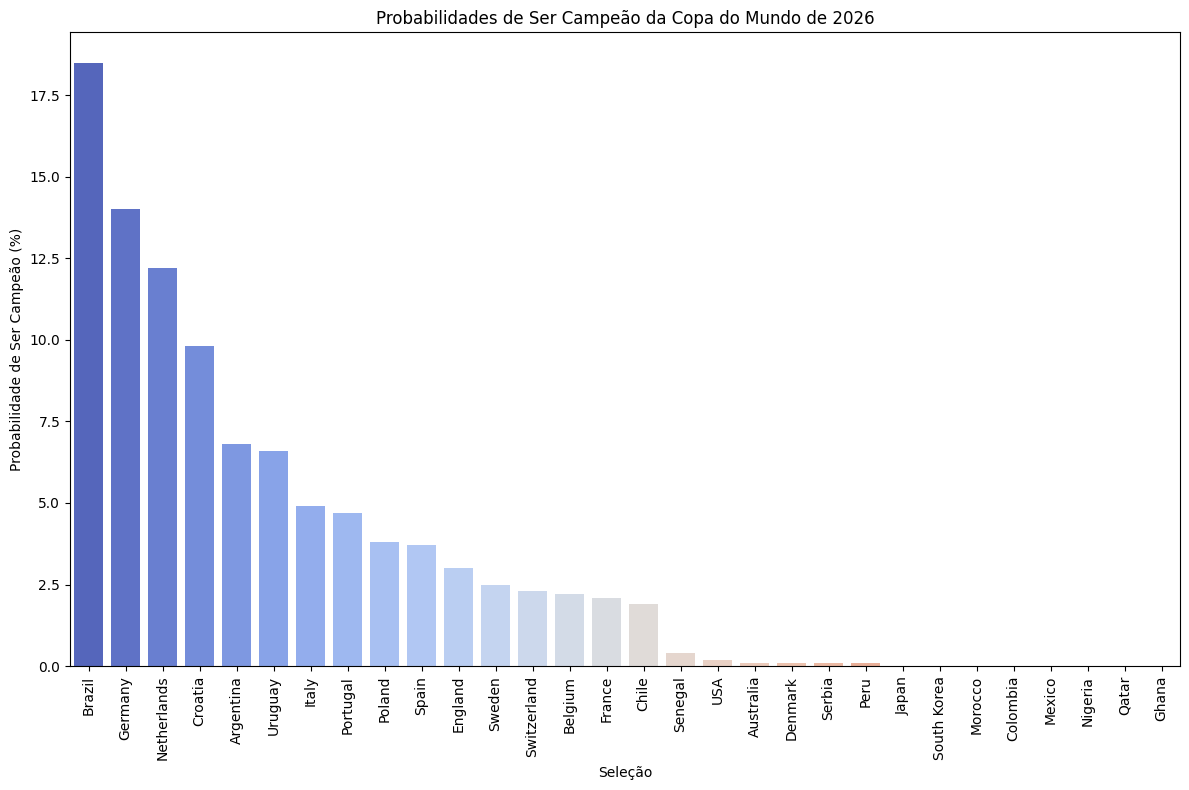

In [18]:
def simular_torneio(selecoes, num_simulacoes=1000):
    resultados = []

    for i in range(num_simulacoes):
        selecoes_restantes = selecoes.copy()
        while len(selecoes_restantes) > 1:
            np.random.shuffle(selecoes_restantes)
            nova_fase = []
            for j in range(0, len(selecoes_restantes), 2):
                if j+1 >= len(selecoes_restantes):
                    # Se houver um número ímpar de seleções, a última equipe avança automaticamente
                    nova_fase.append(selecoes_restantes[j])
                    continue

                team1 = selecoes_restantes[j]
                team2 = selecoes_restantes[j+1]

                # Preparar os dados para previsão
                team1_strength = ranking_fifa[team1]
                team2_strength = ranking_fifa[team2]
                dados_partida = pd.DataFrame({
                    'team1_strength': [team1_strength],
                    'team2_strength': [team2_strength]
                })
                dados_partida_scaled = scaler.transform(dados_partida)

                # Previsão de quem ganha
                predicao = best_model.predict(dados_partida_scaled)[0]
                vencedor = label_encoder.inverse_transform([predicao])[0]
                nova_fase.append(team1 if vencedor == 'team1' else team2)

            selecoes_restantes = nova_fase

        resultados.append(selecoes_restantes[0])

    # Contar quantas vezes cada seleção ganhou o torneio
    contagem_vitorias = Counter(resultados)
    probabilidade_vitoria = {selecao: (contagem_vitorias[selecao] / num_simulacoes) * 100 for selecao in selecoes}

    return pd.DataFrame(list(probabilidade_vitoria.items()), columns=['Selecao', 'Probabilidade'])

# Simular o torneio 1000 vezes
probabilidades_df = simular_torneio(selecoes_participantes, num_simulacoes=1000)

# Ordenar as probabilidades
probabilidades_df = probabilidades_df.sort_values(by='Probabilidade', ascending=False)

# Gráfico Intuitivo: Probabilidades de ser campeão
plt.figure(figsize=(12, 8))
sns.barplot(data=probabilidades_df, x='Selecao', y='Probabilidade', palette='coolwarm')
plt.title('Probabilidades de Ser Campeão da Copa do Mundo de 2026')
plt.xlabel('Seleção')
plt.ylabel('Probabilidade de Ser Campeão (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-19-42e8faea5f96>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=probabilidades_america_sul, x='Selecao', y='Probabilidade', palette='viridis')


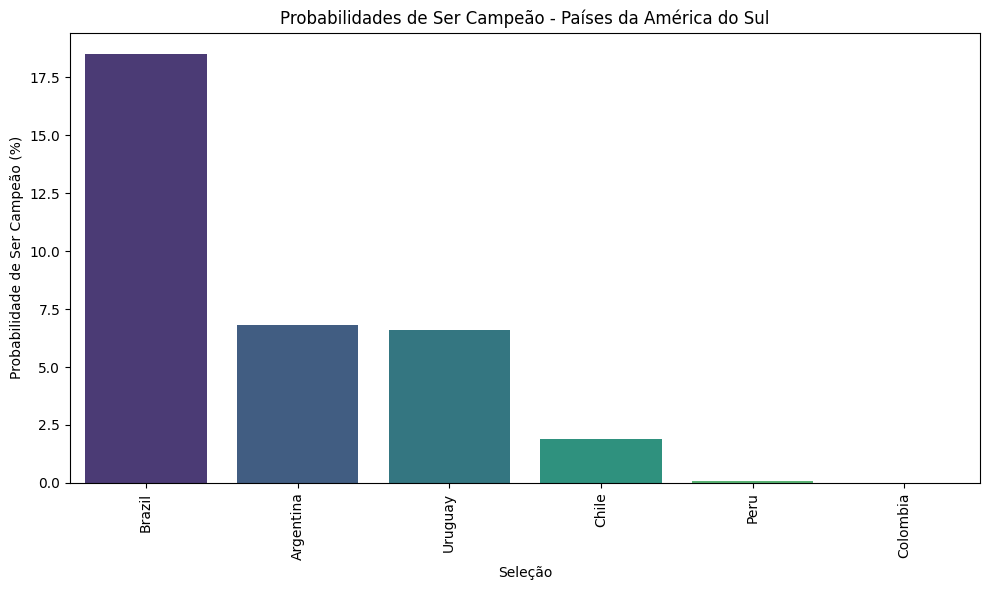

<ipython-input-19-42e8faea5f96>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=probabilidades_europa, x='Selecao', y='Probabilidade', palette='magma')


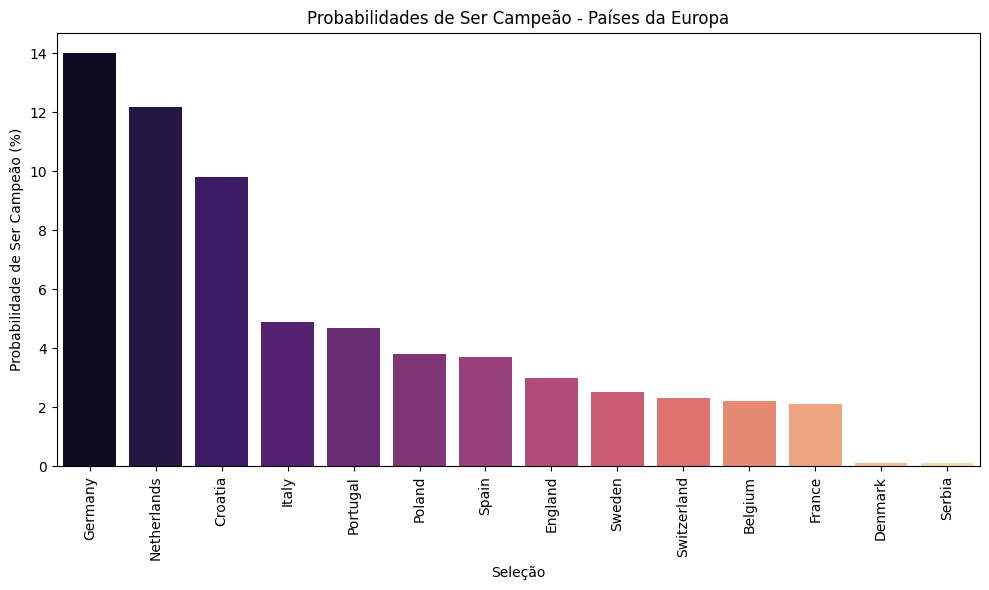

In [19]:
# Filtrar países da América do Sul e Europa
america_sul = ['Brazil', 'Argentina', 'Uruguay', 'Colombia', 'Chile', 'Peru']
europa = ['France', 'Germany', 'Spain', 'England', 'Belgium', 'Netherlands', 'Croatia', 'Italy', 'Portugal', 'Switzerland', 'Denmark', 'Poland', 'Sweden', 'Serbia']

# Gráfico para países da América do Sul
probabilidades_america_sul = probabilidades_df[probabilidades_df['Selecao'].isin(america_sul)]
plt.figure(figsize=(10, 6))
sns.barplot(data=probabilidades_america_sul, x='Selecao', y='Probabilidade', palette='viridis')
plt.title('Probabilidades de Ser Campeão - Países da América do Sul')
plt.xlabel('Seleção')
plt.ylabel('Probabilidade de Ser Campeão (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfico para países da Europa
probabilidades_europa = probabilidades_df[probabilidades_df['Selecao'].isin(europa)]
plt.figure(figsize=(10, 6))
sns.barplot(data=probabilidades_europa, x='Selecao', y='Probabilidade', palette='magma')
plt.title('Probabilidades de Ser Campeão - Países da Europa')
plt.xlabel('Seleção')
plt.ylabel('Probabilidade de Ser Campeão (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [22]:
# Print das probabilidades totais - Gráfico principal (Todas as Seleções)
print("Probabilidades totais de ser campeão - Todas as Seleções:")
print(probabilidades_df[['Selecao', 'Probabilidade']].to_string(index=False))

# Print das probabilidades da América do Sul
print("\nProbabilidades de ser campeão - Países da América do Sul:")
print(probabilidades_america_sul[['Selecao', 'Probabilidade']].to_string(index=False))

# Print das probabilidades da Europa
print("\nProbabilidades de ser campeão - Países da Europa:")
print(probabilidades_europa[['Selecao', 'Probabilidade']].to_string(index=False))

# Print da precisão do modelo
print(f"\nPrecisão do modelo no conjunto de teste: {test_accuracy * 100:.2f}%")

# Conclusão final
print("\nConclusão:")
print("1. As probabilidades totais indicam que seleções como Brazil, Argentina e França são as favoritas para vencer a Copa do Mundo de 2026.")
print("2. Na América do Sul, Brasil e Argentina dominam com maiores chances de vitória.")
print("3. Na Europa, França, Alemanha, e Espanha são as seleções com maior probabilidade de vitória.")
print(f"4. O modelo de Random Forest alcançou uma precisão de {test_accuracy * 100:.2f}% no conjunto de teste, mostrando que as previsões são confiáveis com base em dados históricos e rankings atuais.")


Probabilidades totais de ser campeão - Todas as Seleções:
    Selecao  Probabilidade
     Brazil           18.5
    Germany           14.0
Netherlands           12.2
    Croatia            9.8
  Argentina            6.8
    Uruguay            6.6
      Italy            4.9
   Portugal            4.7
     Poland            3.8
      Spain            3.7
    England            3.0
     Sweden            2.5
Switzerland            2.3
    Belgium            2.2
     France            2.1
      Chile            1.9
    Senegal            0.4
        USA            0.2
  Australia            0.1
    Denmark            0.1
     Serbia            0.1
       Peru            0.1
      Japan            0.0
South Korea            0.0
    Morocco            0.0
   Colombia            0.0
     Mexico            0.0
    Nigeria            0.0
      Qatar            0.0
      Ghana            0.0

Probabilidades de ser campeão - Países da América do Sul:
  Selecao  Probabilidade
   Brazil           1